<a href="https://colab.research.google.com/github/shinmiura/diveintocode-ml/blob/master/%E6%A0%97%E3%81%BE%E3%82%93%E3%81%98%E3%82%85%E3%81%86%E5%95%8F%E9%A1%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

テキストの目的

・基礎的なプログラミング力を確認する

・誘導なしにプログラムを書いてみる

・有名な問題をプログラミングによって解いてみる

どのように学ぶか

「曽呂利新左衛門」「富士山」の課題の発展です。ここまで学んだことを生かして一からプログラムを作り問題を解いてください。

漫画ドラえもんには「バイバイン」という道具が登場する、2のn乗に関する有名なエピソード[1]があります。


[1] 藤子・Ｆ・不二雄(1979)『ドラえもん（１７）』小学館.


「バイバイン」は薬品で、これを振掛けるとその物体は5分ごとに倍に増えるという働きがあります。作中では栗まんじゅうを増やしますが、食べきれなくなったためロケットを使い宇宙に捨てました。


ここで度々話題になるのが、栗まんじゅうはその後宇宙でどのように増えていくのかについてです。さまざまな議論がされていますが、今回は単純に栗まんじゅうの体積がどう増えるかを計算してみましょう。





【問題】栗まんじゅうが太陽系を覆う日

1個の栗まんじゅうにバイバインを振りかけた場合、太陽系が栗まんじゅうで覆われるのは何分後でしょうか。これを計算するプログラムを作成してください。


栗まんじゅうや太陽系の体積を調査した上で仮定して計算してください。栗まんじゅうの隙間や重力などは考えず、問題を単純化して構いません。


ボールにバイバインを振りかけた時、東京ドームが一杯になる時間など他の状況にも適用できるような汎用的なプログラムを作成してください。また、グラフを表示するなど分かりやすいノートブックを作成してください。

In [11]:
import math
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
# 超えるまでの計算なので、富士山折紙と同じ考え方でやってみる。
"""
①太陽系の体積を出しておく
なお、Wikipediaによると、ヘリオポーズまでの距離 = ~120au
heliopause = 120 * 149597870700 # keisan.casio.jpを利用して長さ換算
volume_of_solar_system = (4 / 3) * math.pi * heliopause ** 3
print("太陽系の体積は、{}m^3".format(volume_of_solar_system))

②栗まんじゅうの体積を出す
volume_of_kurimanjyu = 60 * 40 * 30 * (10 ** (-9))
print("栗まんじゅうの体積は、{}m^3".format(volume_of_kurimanjyu))
"""

'\n①太陽系の体積を出しておく\nなお、Wikipediaによると、ヘリオポーズまでの距離 = ~120au\nheliopause = 120 * 149597870700 # keisan.casio.jpを利用して長さ換算\nvolume_of_solar_system = (4 / 3) * math.pi * heliopause ** 3\nprint("太陽系の体積は、{}m^3".format(volume_of_solar_system))\n\n②栗まんじゅうの体積を出す\nvolume_of_kurimanjyu = 60 * 40 * 30 * (10 ** (-9))\nprint("栗まんじゅうの体積は、{}m^3".format(volume_of_kurimanjyu))\n'

In [13]:
# 栗まんじゅうの体積(単位：㎥)
volume_of_kuri_manju = 60 * 40 * 30 * (10 ** (-9))
print("栗まんじゅうの体積は、{}m^3".format(volume_of_kuri_manju))

# 太陽系の体積
heliopause = 120 * 149597870700  # keisan.casio.jpを利用して長さ換算
volume_of_solar_system = (4 / 3) * math.pi * heliopause ** 3
print("太陽系の体積は、{}m^3".format(volume_of_solar_system))

栗まんじゅうの体積は、7.2e-05m^3
太陽系の体積は、2.4233078189139725e+40m^3


In [14]:
def baibain(volume_of_spaces, volume_of_sprinkled_object, minutes_per_count = 5):
  # 関数の目的は、何分後に空間が覆われてしまうかを返すこと
  """
  Parameters
  --------
  volume_of_sapces : int
  空間の体積(m^3)
  volume_of_sprinkled_object : int
  バイバインを振りかけられるものの体積(m^3)
  minutes_per_count
  倍になるタイミング（分） (default : 5)

  Returns
  --------
  覆われてしまうまでの時間
  minutes: int
  """
  # 体積のリストを作成
  list_of_volumes = [volume_of_sprinkled_object]
  # 倍増した回数をカウント。初期値の設定。
  increased_count = 0
  
  # バイバインをかけられた物体の体積が空間の体積を超えるまで回数を数える
  while True:
    list_of_volumes.append(list_of_volumes[-1] * 2)
    increased_count += 1
    if list_of_volumes[-1] >= volume_of_spaces:
      break

  # ５分ごとで数えると汎用性が下がるため回数を上でカウントしたものに１カウントごとに要する分数を乗じる    
  minutes = increased_count * minutes_per_count

  return minutes, increased_count, list_of_volumes

# 空間の体積に太陽系の体積を設定
volume_of_spaces = volume_of_solar_system  # 栗まんじゅうの体積
# バイバインをかけられる物体の体積に栗まんじゅうの体積を設定
volume_of_sprinkled_object = volume_of_kuri_manju
minutes, increased_count, list_of_volumes = baibain(volume_of_spaces, volume_of_sprinkled_object, minutes_per_count = 5)
print("1個の栗まんじゅうにバイバインを振りかけた場合、太陽系が栗まんじゅうで覆われるのは{}分後".format(minutes))

1個の栗まんじゅうにバイバインを振りかけた場合、太陽系が栗まんじゅうで覆われるのは740分後


NameError: ignored

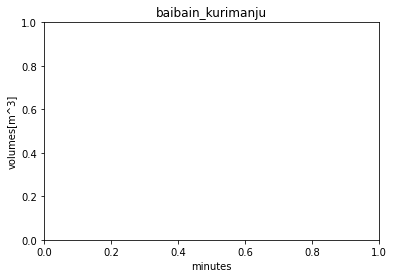

In [17]:
# グラフを表示する。タイトルと軸ラベル名付き。
plt.title("baibain_kurimanju")
plt.xlabel("minutes")
plt.ylabel("volumes[m^3]")
plt.plot(range(0, (minutes + 1), minutes_per_count), list_volumes, label = "sprinkled_object")  # 「リスト名」のところにリストの変数名を入れる
plt.legend()
plt.show()